In [315]:
%matplotlib notebook

In [316]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [317]:
def printf(*args): print(*args, sep='\n\n', end='\n\n')
def search(obj,strng): print([x for x in dir(obj) if strng in x])

In [624]:
# %matplotlib notebook -> for interactive plots
# %matplotlib inline -> static plots

In [625]:
# matplotlib  -> pyplot (procedural method for building viz)
# svg,html -> declarative methods to build viz

In [626]:
# matplotlib architecture
# 3 LAYERS: Backend layer -> Artist layer -> Scripting layer
# Backend layer has 3 abstract interfaces:
#      FigureCanvas -> surface to draw
#      Renderer -> performs the drawing
#      Event -> handle mouse and keyboard events
# Artist layer
# Scripting layer -> enables easy use of matplotlib
#                -> use pyplot interface

In [627]:
# pyplot maintains state internally
# this enables us to create a new figure by plt.figure() and use plt methods which are mapped to the figure created,
# without any explicit use of figure object (returned by plt.figure())

In [628]:
mpl.get_backend() #current backend

'module://ipykernel.pylab.backend_inline'

### Simple plot

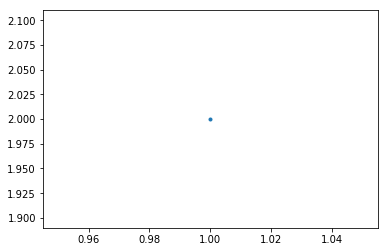

In [629]:
# A simple plot
plt.plot(1,2, '.')

In [630]:
plt.gcf() #returns reference to current figure

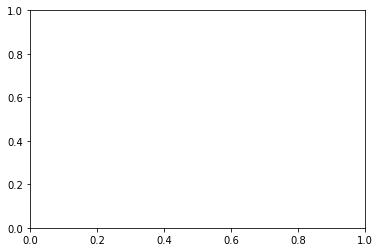

In [631]:
plt.gca() #returns current Axes instance

In [632]:
# The same as above, without using plt (pyplot)
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure
fig=Figure()
canvas=FigureCanvasAgg(fig) #canvas to render figure(fig) into
ax=fig.add_subplot(111) #returs Axes object
ax.plot(1,2,'.')
canvas.print_jpeg("12plot.jpeg")

In [633]:
#print methods of canvas obejct
[x for x in dir(canvas) if "print" in x]

['print_figure',
 'print_jpeg',
 'print_jpg',
 'print_png',
 'print_raw',
 'print_rgba',
 'print_tif',
 'print_tiff',
 'print_to_buffer']

In [634]:
%%html
<img src="12plot.jpeg"/>

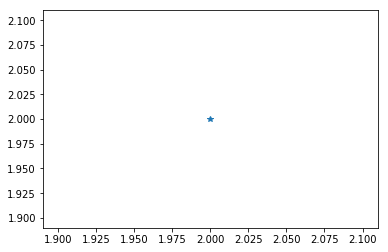

In [635]:
# Modifying the existing figure from plt by adding point to axes instance of plt
fg=plt.gcf()
a=plt.gca()
a.plot(2,2,'*')
cvs=FigureCanvasAgg(fg)
cvs.print_jpeg("2plots.jpeg")
plt.show() #updates the interactive figure above

In [636]:
%%html
<img src="2plots.jpeg"/>

In [637]:
plt.figure() #create a new figure
# 2 figures are shown because it also returns the figure created

[0, 10, 0, 5]

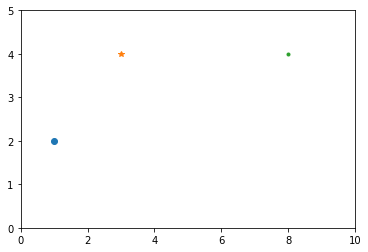

In [638]:
# Create multiple plots using plt.plot or plt.gca().plot methods
plt.figure()
plt.plot(1,2,'o') #plt creates a patch for this and adds it to the Axes instance 'instance plt.gca()'
plt.plot(3, 4, '*')
ax=plt.gca()
ax.plot(8,4,'.') #directly add using ax.plot
ax.axis([0,10,0,5]) #axis([x_min, x_max, y_min, y_max])

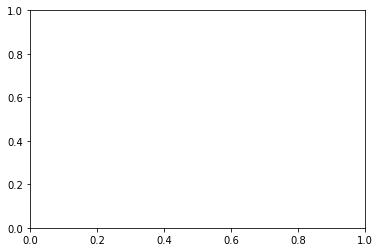

In [639]:
axs=plt.gca()
axs.get_children() #returns children artists

## Scatter Plot

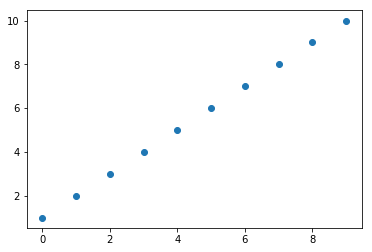

In [640]:
# Basic Scatter plot using plt
fg=plt.figure()
x=np.arange(10)
y=x+1
plt.scatter(x,y)

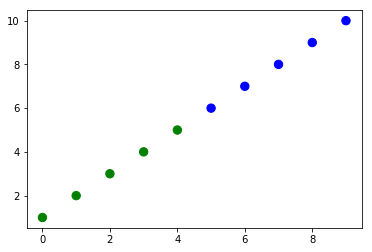

In [641]:
# Scatter plot, with different colors and adjusted data point size
fg2=plt.figure() #if not, the previous plot is updated if using %matplotlib notebook
c=["green"]*5+["blue"]*5
plt.scatter(x,y,s=70, c=c) #s=size of datapoints, c=colors

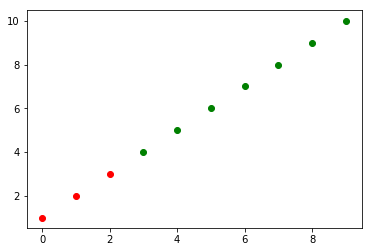

In [642]:
plt.figure()
plt.scatter(x[:3], y[:3],c="red", label="triples") #label is provided, which is useful to create a legend
plt.scatter(x[3:], y[3:], c="green", label="rest")

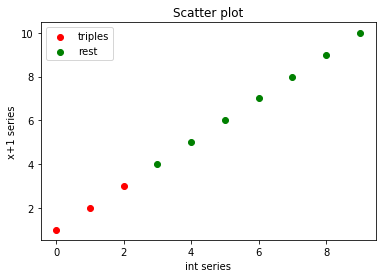

In [643]:
# A complete scatter plot, with labels, title and legend
plt.figure()
plt.scatter(x[:3], y[:3],c="red", label="triples") #label is provided, which is useful to create a legend
plt.scatter(x[3:], y[3:], c="green", label="rest")
plt.xlabel("int series")
plt.ylabel( "x+1 series")
plt.title("Scatter plot")
plt.legend() #loc={1,2,3,4} position in four quadrants, title="Legend"

## Line plot

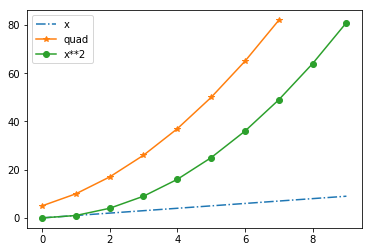

In [644]:
x=np.arange(10) # 10 points
x2=x[:-2]**2+4*x[:-2]+5 #8 points
plt.plot(x,'-.',x2,'-*',x**2, '-o') #'-' for only line, '-o' for line, with 'o' for points
plt.legend(["x", "quad", "x**2"]) #only y values are specified, x values are infered as index of arrays

#### fill_region

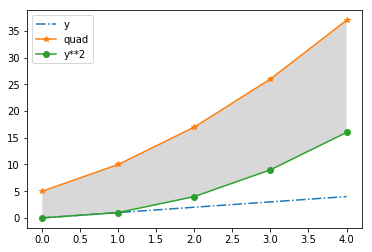

In [645]:
# fill region between two plots
plt.figure()
y=np.arange(5) # 5 points
y2=y**2+4*y+5
plt.plot(y,'-.',y2,'-*',y**2, '-o') #'-' for only line, '-o' for line, with 'o' for points
plt.legend(["y", "quad", "y**2"])
ax=plt.gca()
#ax.fill_between(range(len(y2)), y2) #fill region below y2
ax.fill_between(range(len(y)),y**2, y2, facecolor="gray", alpha=0.3) #fill region between y**2 and y2 polts

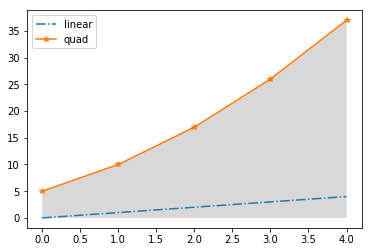

In [646]:
# fill region between two plots
plt.figure()
x=np.arange(5) # 5 points
y1=x
y2=x**2+4*x+5
plt.plot(y1,'-.',y2,'-*')
plt.legend(["linear", "quad"])
ax=plt.gca()
#ax.fill_between(x,y1, y2, facecolor="gray", alpha=0.3, ) #fill region between y1 and y2
ax.fill_between(x,y2, facecolor="gray", alpha=0.3, ) #fill region below y2
#ax.fill_between(x,y1,facecolor="gray", alpha=0.3) #fill region below y1
# ax.fill_betweenx #fill along the other axis

### plot time on x axis

In [647]:
import datetime

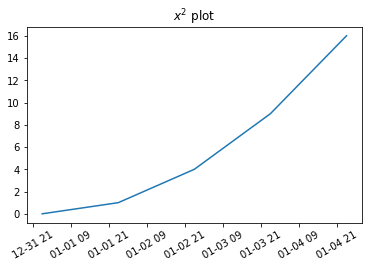

In [648]:
plt.figure()
y=np.arange(5)**2
td=datetime.datetime.today()
days=pd.to_datetime(["2017-01-{}".format(i) for i in range(1,6)]).tolist()
#or
#days=[pd.Timestamp(td)+pd.Timedelta(i,'d') for i in range(5)] #5 consecutive days
plt.plot(days,y)
#cleaning the overlap of xlabels
xax=plt.gca().xaxis
for label in xax.get_ticklabels(): label.set_rotation("30") #better
plt.subplots_adjust(bottom=0.2) #to tune subplot layout, can set for top,left,right too
plt.title("$x^2$ plot") #mpl supports subset of Tex markup 

In [649]:
[x for x in dir(plt) if "subplot" in x]

['subplot', 'subplot2grid', 'subplot_tool', 'subplots', 'subplots_adjust']

## bar plot

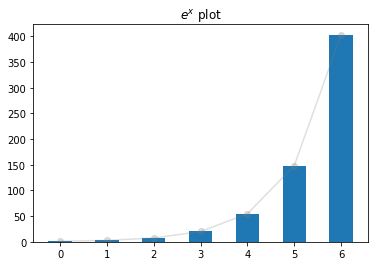

In [650]:
x=np.arange(7)
y=np.exp(x)
plt.figure()
plt.plot(x,y, '-o', c="gray", alpha=0.25)
plt.bar(x,y, width=0.5) # plt.bar(x, height, width)
plt.title("$e^x$ plot")

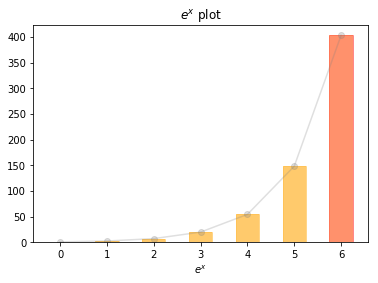

In [651]:
# tweak the bar plot visuals
x=np.arange(7)
y=np.exp(x)
plt.figure()
plt.title("$e^x$ plot")
plt.xlabel("$e^x$")
plt.plot(x,y, '-o', c="gray", alpha=0.25)
plt.bar(x,y, width=0.5, color="orange", alpha=0.35) # change color and alpha values
barc=plt.bar(x,y, width=0.5, color=["orange"]*(len(x)-1)+["green"], alpha=0.35) # individual bar colors

# individual bars can be colored through the set_color method of each bar objects
# each of the bars in the bar-plot (i.e. matplotlib.patches.Rectangle object) is stored as a child
for i,bar in enumerate(barc):
    if i==6: bar.set_color("red")
    else: bar.set_color("orange")



### multiple bar plots

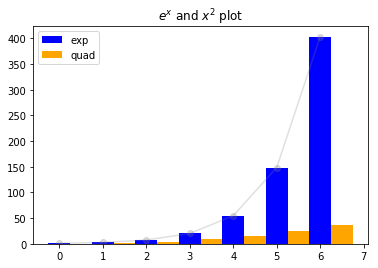

In [652]:
x=np.arange(7)
y=np.exp(x)
plt.figure()
plt.plot(x,y, '-o', c="gray", alpha=0.25)
height,width=y,0.5
y2=x**2
plt.bar(x,height, width, color="blue", label="exp") # plt.bar(x, height, width)
#plt.plot(x+width,y2,'-o', c="green", alpha=0.25)
plt.bar(x+width,y2, width, color="orange", label="quad") # x+width is required to prevent overlapping of the two plots
plt.title("$e^x$ and $x^2$ plot")
plt.legend()

[96, 66, 81, 78, 84, 71, 73]


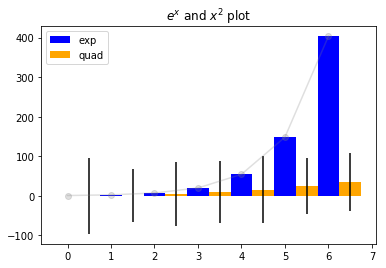

In [653]:
## some more things with bar charts
x=np.arange(7)
y=np.exp(x)
plt.figure()
plt.plot(x,y, '-o', c="gray", alpha=0.25)
height,width=y,0.5
y2=x**2
plt.bar(x,height, width, color="blue", label="exp") # plt.bar(x, height, width)
#plt.plot(x+width,y2,'-o', c="green", alpha=0.25)
plt.title("$e^x$ and $x^2$ plot")

# adding yerror values
y_err=[np.random.randint(10,100) for _ in x]
print(y_err)
plt.bar(x+width,y2, width, color="orange", label="quad", yerr=y_err)
# x+width is required to prevent overlapping of the two plots
plt.legend()

### stacked bar plots

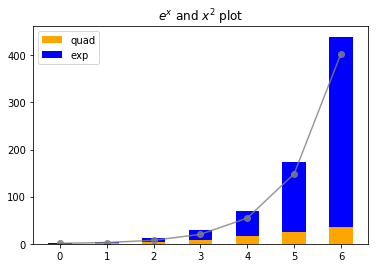

In [654]:
x=np.arange(7)
y=np.exp(x)
plt.figure()
plt.plot(x,y, '-o', c="gray", alpha=0.8)
height,width=y,0.5
y2=x**2
plt.bar(x,y2, width, color="orange", label="quad")
plt.bar(x,height, width, bottom=y2, color="blue", label="exp") # bottom = bottom_stack_values
# the exp bars should be ajusted in length to match the actual height (shown by gray circles)
plt.title("$e^x$ and $x^2$ plot")
plt.legend()

### horizontal bar graphs

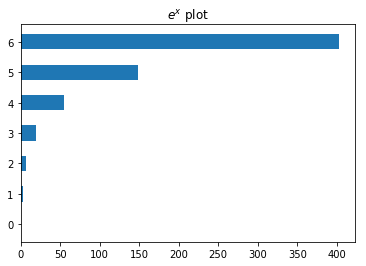

In [655]:
x=np.arange(7)
y=np.exp(x)
plt.figure()
plt.barh(x,y, height=0.5) # plt.barh(x, width, height)
plt.title("$e^x$ plot")

### stacked horizontal bar graphs

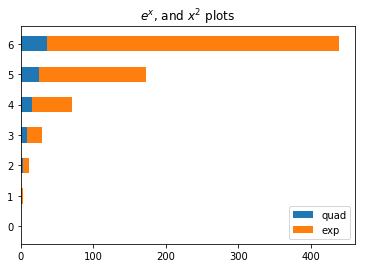

In [656]:
x=np.arange(7)
y=np.exp(x)
y2=x**2
plt.figure()
plt.barh(x,y2,height=0.5, label="quad")
plt.barh(x,y,left=y2,height=0.5, label="exp") # left=values_at_the_bottom
plt.legend(loc=4)
plt.title("$e^x$, and $x^2$ plots")

#### control ticks on axes

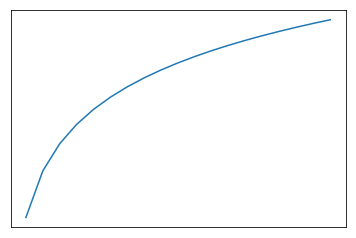

In [657]:
f=plt.figure()
x=np.arange(1,20)
y=np.log(x)
plt.plot(y, label="log")
plt.tick_params(axis="both", # axis={"x","y","both"}
                top="off", bottom="off", left="off", right="off", #{"on","off"} ticks
               labelleft="off", labelbottom="off" # {"on", "off"} labels
               )

#### remove the borders (splines)

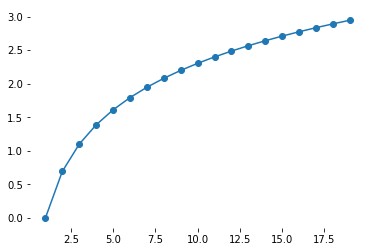

In [658]:
f=plt.figure()
x=np.arange(1,20)
y=np.log(x)
plt.plot(x,y, '-o', label="log")
ax=plt.gca()
for side,spline_obj in ax.spines.items(): #ax.spines is an OrderedDict: {"left","right","bottom","top"} -> mpl.spines.Spine
    spline_obj.set_visible(False)


In [659]:
ax.spines

OrderedDict([('left', <matplotlib.spines.Spine at 0x160776550>),
             ('right', <matplotlib.spines.Spine at 0x160c944a8>),
             ('bottom', <matplotlib.spines.Spine at 0x160c94128>),
             ('top', <matplotlib.spines.Spine at 0x160c94940>)])

([<matplotlib.axis.XTick at 0x160776e48>,
 <a list of 19 Text xticklabel objects>)

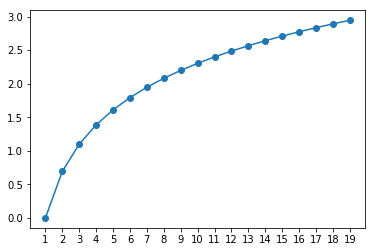

In [660]:
#get/set ticks/labels

f=plt.figure()
x=np.arange(1,20)
y=np.log(x)
plt.plot(x,y, '-o', label="log")
ax=plt.gca()
#loc,ticks=plt.xticks() #gets current loctions,tick values as a list
#plt.xticks(range(5)) #set ticks
plt.xticks(x, x) #set labels for ticks

#### change label color/alpha

<IPython.core.display.Javascript object>


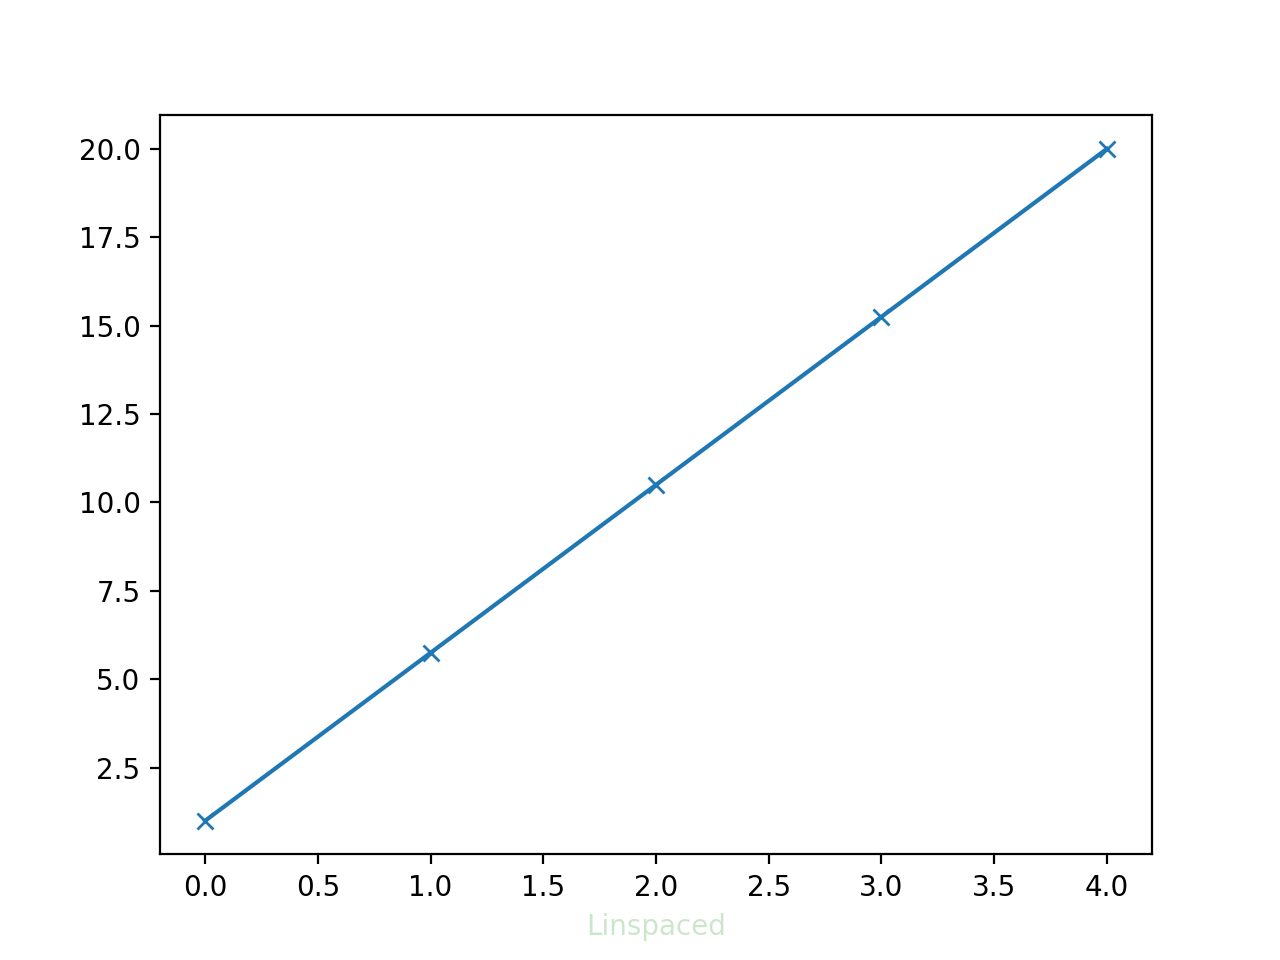

In [4]:
plt.figure()
ax=plt.gca()
plt.plot(np.linspace(1,20,5), '-x')
plt.xlabel("Linspaced", alpha=0.2)
ax.xaxis.label.set_color("green")
# xlabel, ylabel and title methods of plt accept alpha parameter

#### add text to a plot

<IPython.core.display.Javascript object>


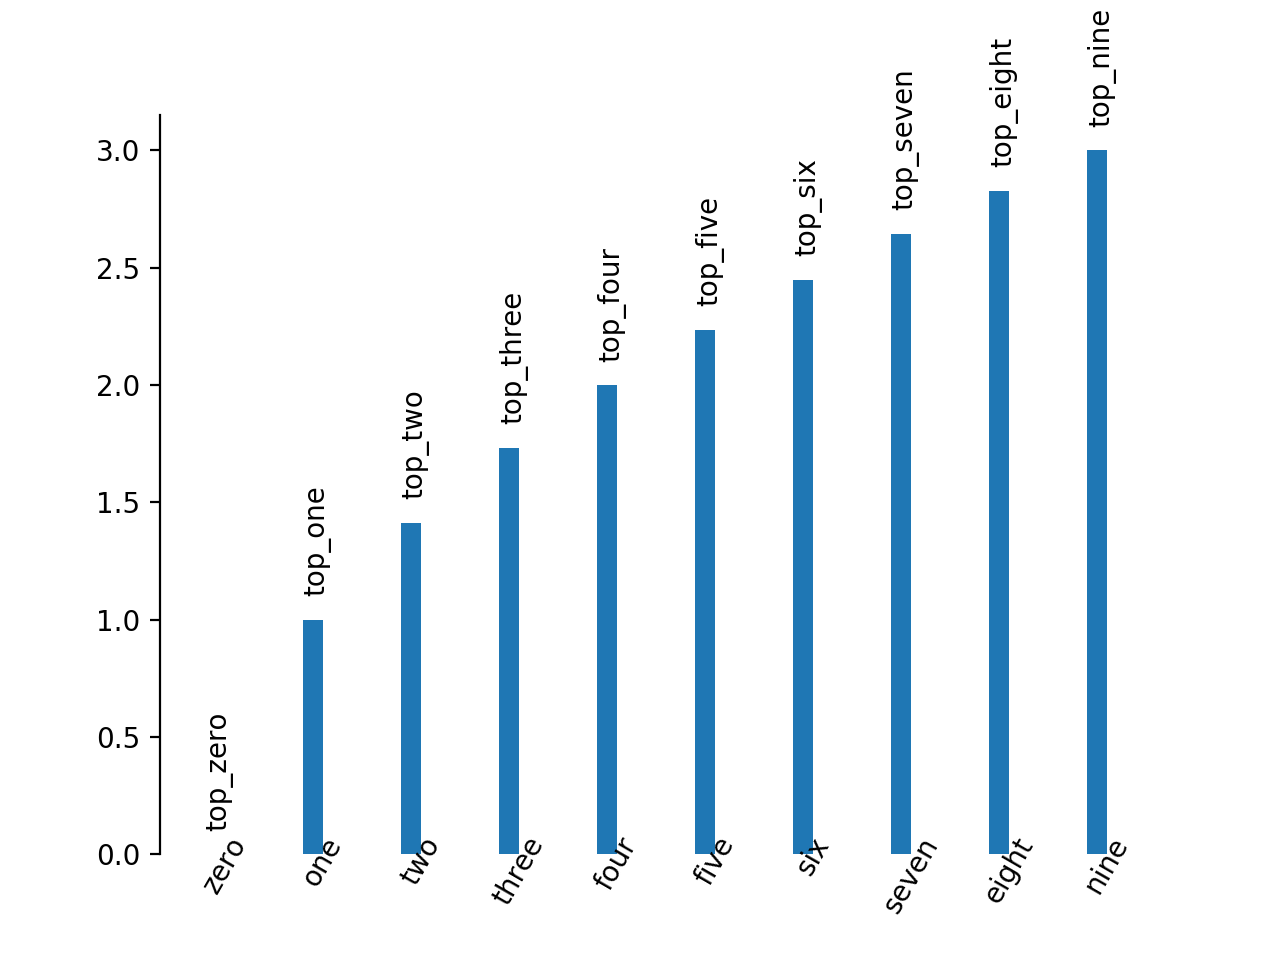

In [5]:
f=plt.figure()
x=np.arange(10)
y=np.sqrt(x)
barc=plt.bar(x,y, width=0.2)
ax=plt.gca()
labels="zero-one-two-three-four-five-six-seven-eight-nine".split('-')
#plt.text or plt.gca().test can be used to set the text
#plt.text(x,y, text)
# get_x,get_y,get_height,get_width are some methods of mpl.patches.Rectangle object
for i,bar in enumerate(barc.get_children()):
    plt.text(bar.get_x()+bar.get_width(), bar.get_y(), labels[i], ha="center", rotation="60") # bbox=dict(facecolor="red", alpha=0.2) for a bounding box around text
    # ha -> horizontal alignment
    plt.text(bar.get_x(), bar.get_height()+0.1, "top_"+labels[i], rotation="90", va="bottom") # label the top of the boxes
    # va -> vertical alignment
ax=plt.gca()
bar.get_height
ax.xaxis.set_visible(False)
for side,spine_obj in ax.spines.items():
    if side!="left": spine_obj.set_visible(False)

In [663]:
[x for x in dir(barc.get_children()[0]) if "get" in x]

['__getattribute__',
 '__getstate__',
 'get_aa',
 'get_agg_filter',
 'get_alpha',
 'get_animated',
 'get_antialiased',
 'get_axes',
 'get_bbox',
 'get_capstyle',
 'get_children',
 'get_clip_box',
 'get_clip_on',
 'get_clip_path',
 'get_contains',
 'get_cursor_data',
 'get_data_transform',
 'get_ec',
 'get_edgecolor',
 'get_extents',
 'get_facecolor',
 'get_fc',
 'get_figure',
 'get_fill',
 'get_gid',
 'get_hatch',
 'get_height',
 'get_joinstyle',
 'get_label',
 'get_linestyle',
 'get_linewidth',
 'get_ls',
 'get_lw',
 'get_patch_transform',
 'get_path',
 'get_path_effects',
 'get_picker',
 'get_rasterized',
 'get_sketch_params',
 'get_snap',
 'get_transform',
 'get_transformed_clip_path_and_affine',
 'get_url',
 'get_verts',
 'get_visible',
 'get_width',
 'get_window_extent',
 'get_x',
 'get_xy',
 'get_y',
 'get_zorder']

In [664]:
type(barc.get_children()[0])

matplotlib.patches.Rectangle

### Subplots

<IPython.core.display.Javascript object>


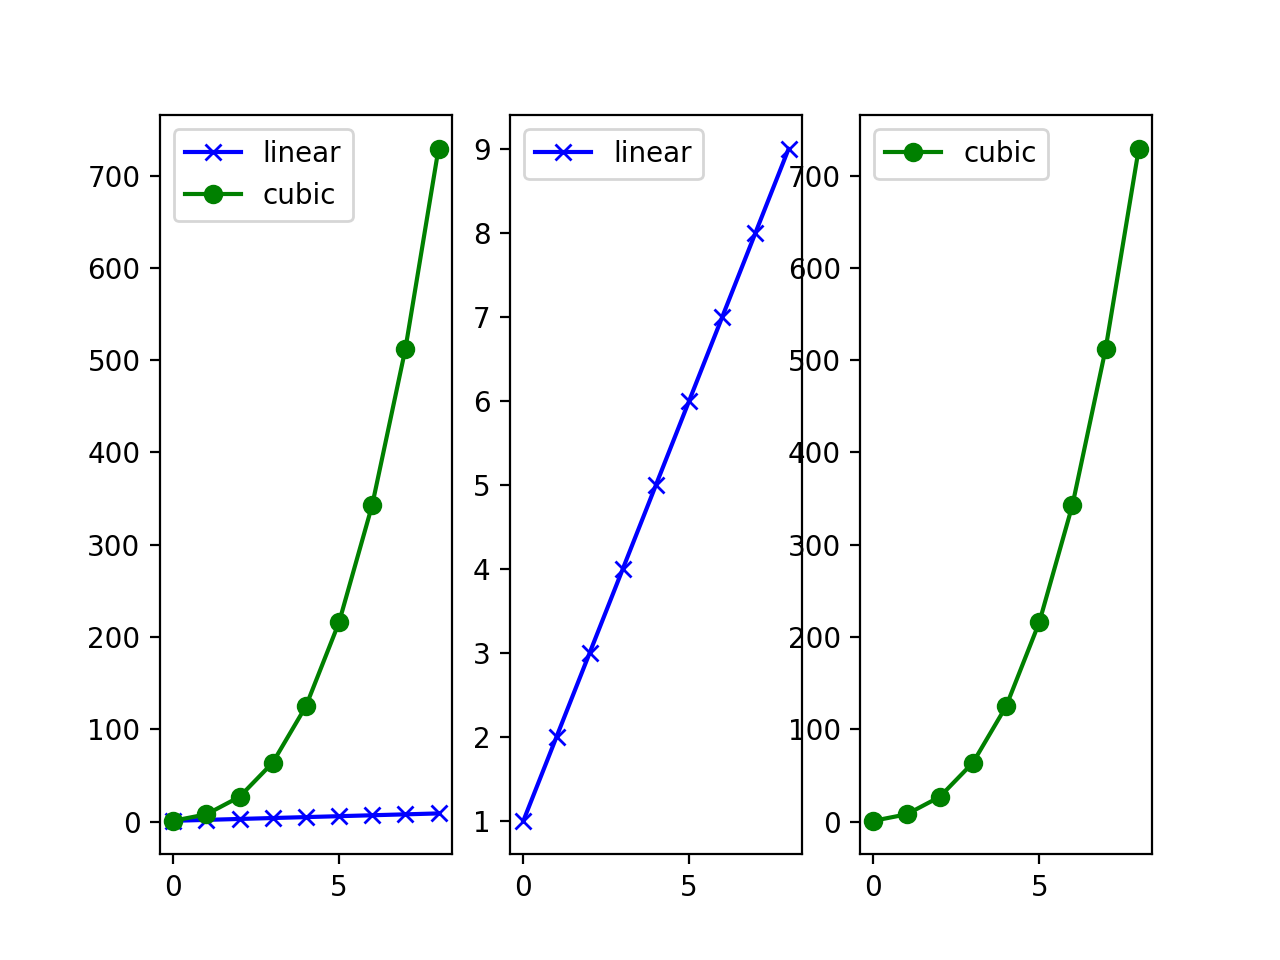

In [13]:
plt.figure()
plt.subplot(1,3,1) #returns subplot axes for the specified subplot
#plt.plot() # implicitly creates a subplot(1,1,1)
# plt.subplot(n_rows,n_cols, subplot_number)
linear=np.arange(1,10)

plt.plot(linear, '-x', color='b', label="linear") #plt referst to the most recent subplot
plt.subplot(1,3,2)
plt.plot(linear, '-x', color='b', label="linear")
plt.legend()
cubic=linear**3
plt.subplot(1,3,3)
plt.plot(cubic, '-o', color='g', label="cubic")
plt.legend()
# to modify a previous subplot
# plt.subplot(1,3,1) #this references the first subplot
# or can store the return value of the first subplot call and use its plt method
plt.subplot(1,3,1)
plt.plot(cubic, '-o', color='g', label="cubic")
plt.legend() #works only for the latest subplot

### subplots with shared axes

<IPython.core.display.Javascript object>


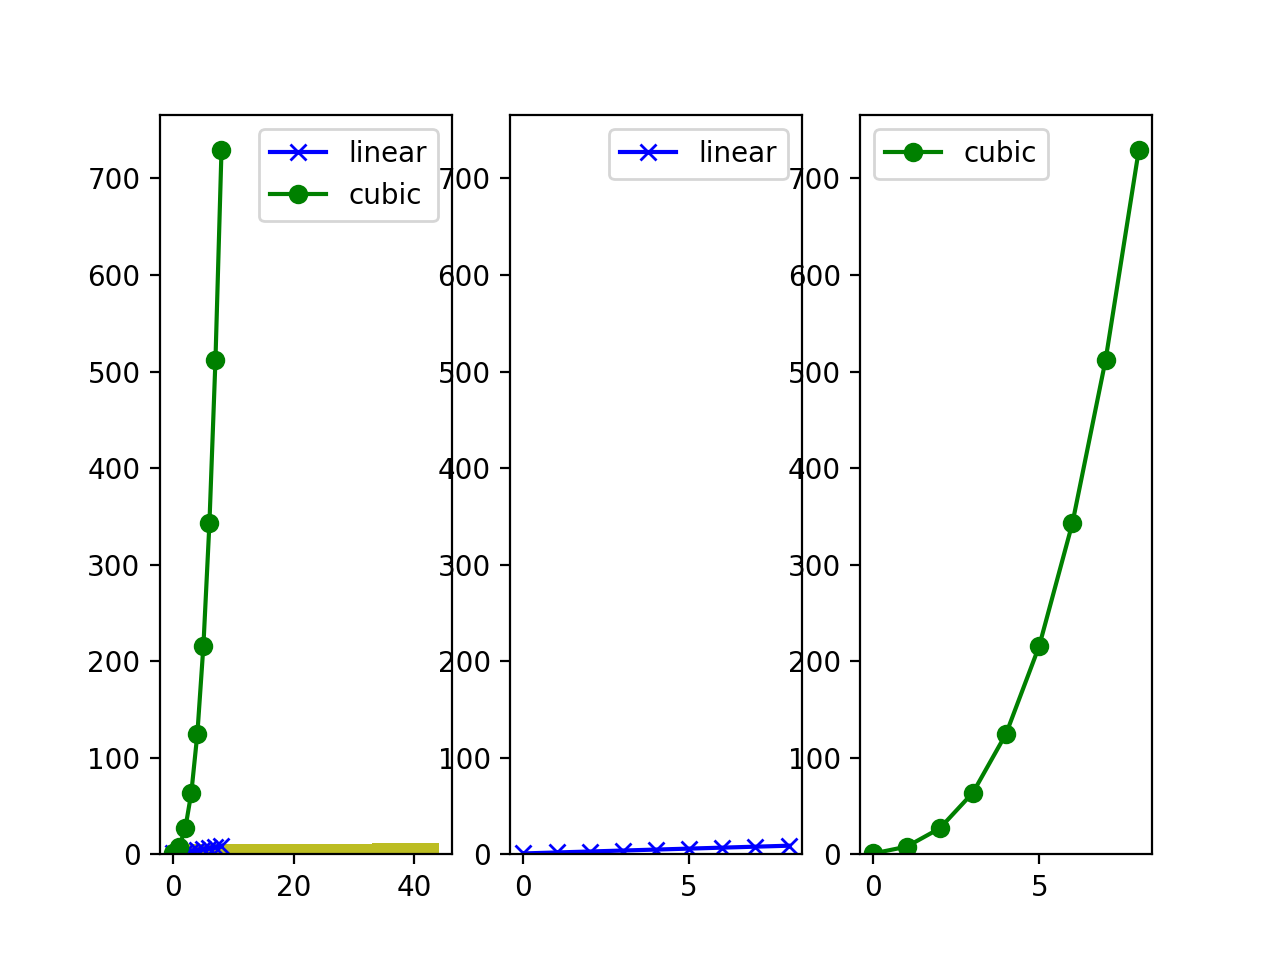

In [15]:
plt.figure()
ax0=plt.subplot(1,3,1)
linear=np.arange(1,10)
plt.plot(linear, '-x', color='b', label="linear")
ax1=plt.subplot(1,3,2, sharey=ax0) #share y axis of ax0 (subplot1)
plt.plot(linear, '-x', color='b', label="linear")
plt.legend()
cubic=linear**3
plt.subplot(1,3,3, sharey=ax1) #share y axis of ax1 (subplot1)
plt.plot(cubic, '-o', color='g', label="cubic")
plt.legend()
plt.subplot(1,3,1)
plt.plot(cubic, '-o', color='g', label="cubic")
plt.legend() 

### subplot using subplots method

<IPython.core.display.Javascript object>


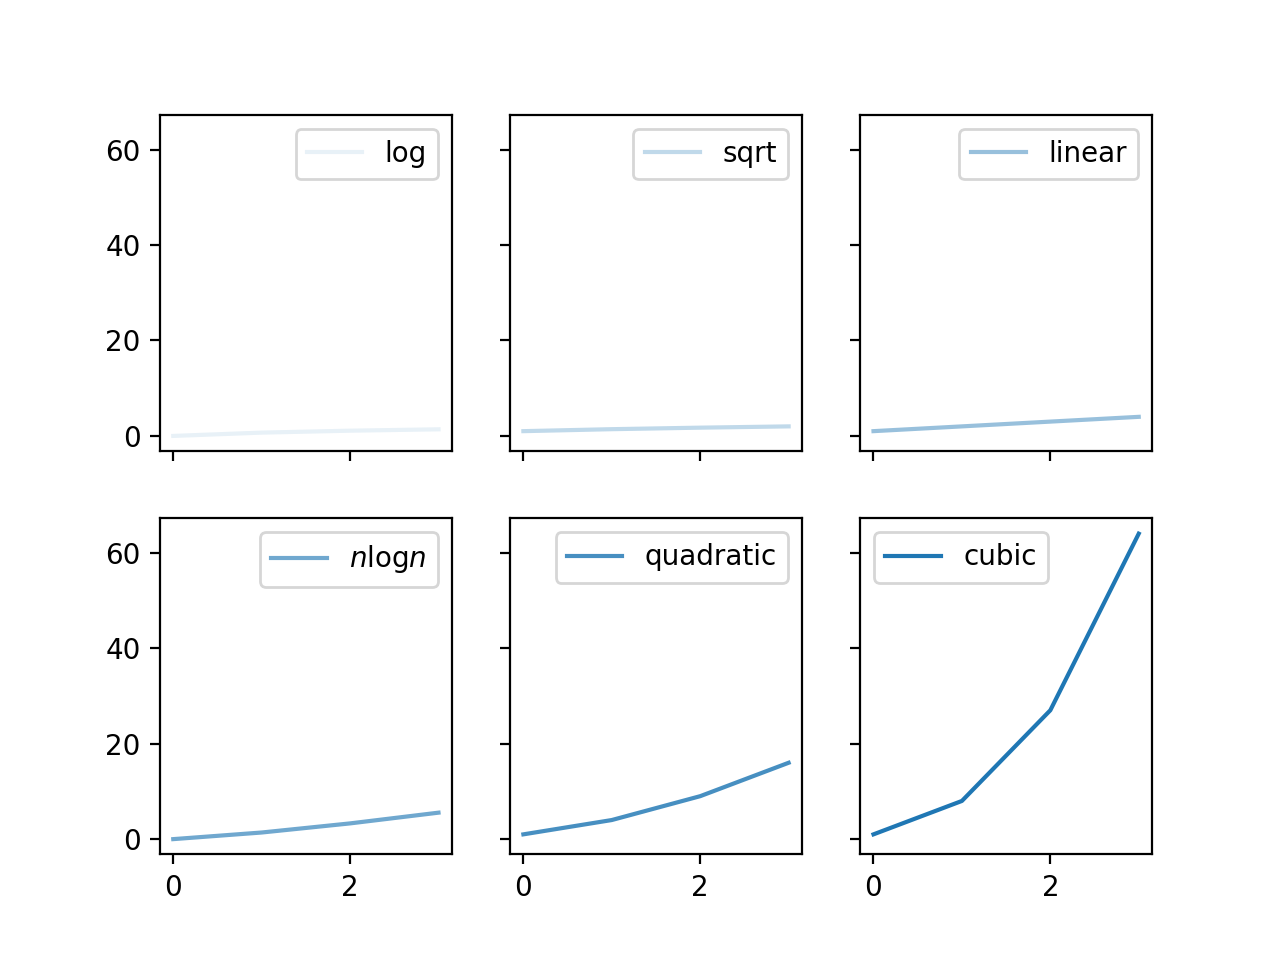

In [231]:
fig,axes=plt.subplots(2,3, sharex=True, sharey=True) #axes is a (2,3) np.array

In [232]:
x=np.arange(1,5)
funcs=np.array([[np.log(x), np.sqrt(x), x],
       [x*np.log(x), x**2, x**3]])
labels=np.array([["log","sqrt", "linear"],
        ["$n\log n$", "quadratic", "cubic" ]])
alphas=np.linspace(0.1,1.0,6).reshape(2,-1)

In [233]:
for i,row in enumerate(axes):
    for j,ax in enumerate(row):
        func=funcs[i,j]
        
        #plt.plot(func, label=labels[i,j], alpha=alphas[i,j]) #plots all to the last subplot, 
        # as that is the current axis (plt.gca())
        #to use plt.plot first set the axis as current axis (plt.sca(axis_instance_name))
        plt.sca(ax) #
        plt.plot(func, label=labels[i,j], alpha=alphas[i,j])
        plt.legend()
        # or 
        #ax.plot(func, label=labels[i,j], alpha=alphas[i,j])
        #ax.legend()

In [234]:
# Moral -> higher order of growth (cubic function here) trumps all lower orders (given sufficient time)

## histogram

<IPython.core.display.Javascript object>


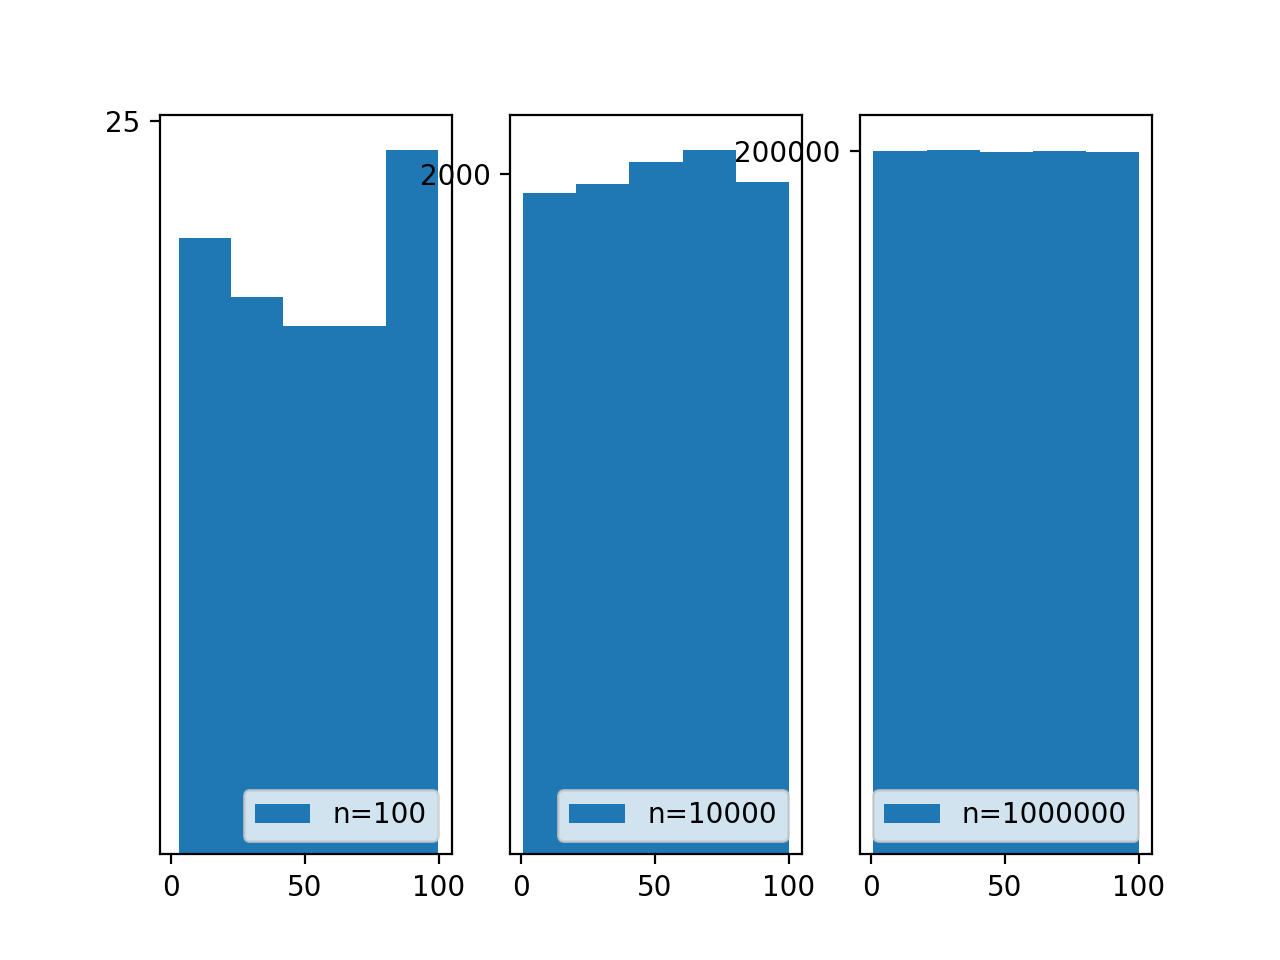

In [368]:
#histogram of uniform distribution
f,axes=plt.subplots(1,3,sharex=True)
ns=[100,10000,1000000]
for ax,n in zip(axes,ns):
    nsample=np.random.uniform(1,100,n)
    ax.hist(nsample,5, label="n={}".format(n))
    #ax.hist/plt.hist(x, number_of_bins), plt.hist needs to be preceded by plt.sca(ax)
    ax.legend(loc=4)
    for ylab in ax.get_yticklabels()[:-2]:
        ylab.set_visible(False)
    for ytl in ax.get_yticklines()[:-4]:
        ytl.set_visible(False)

<IPython.core.display.Javascript object>


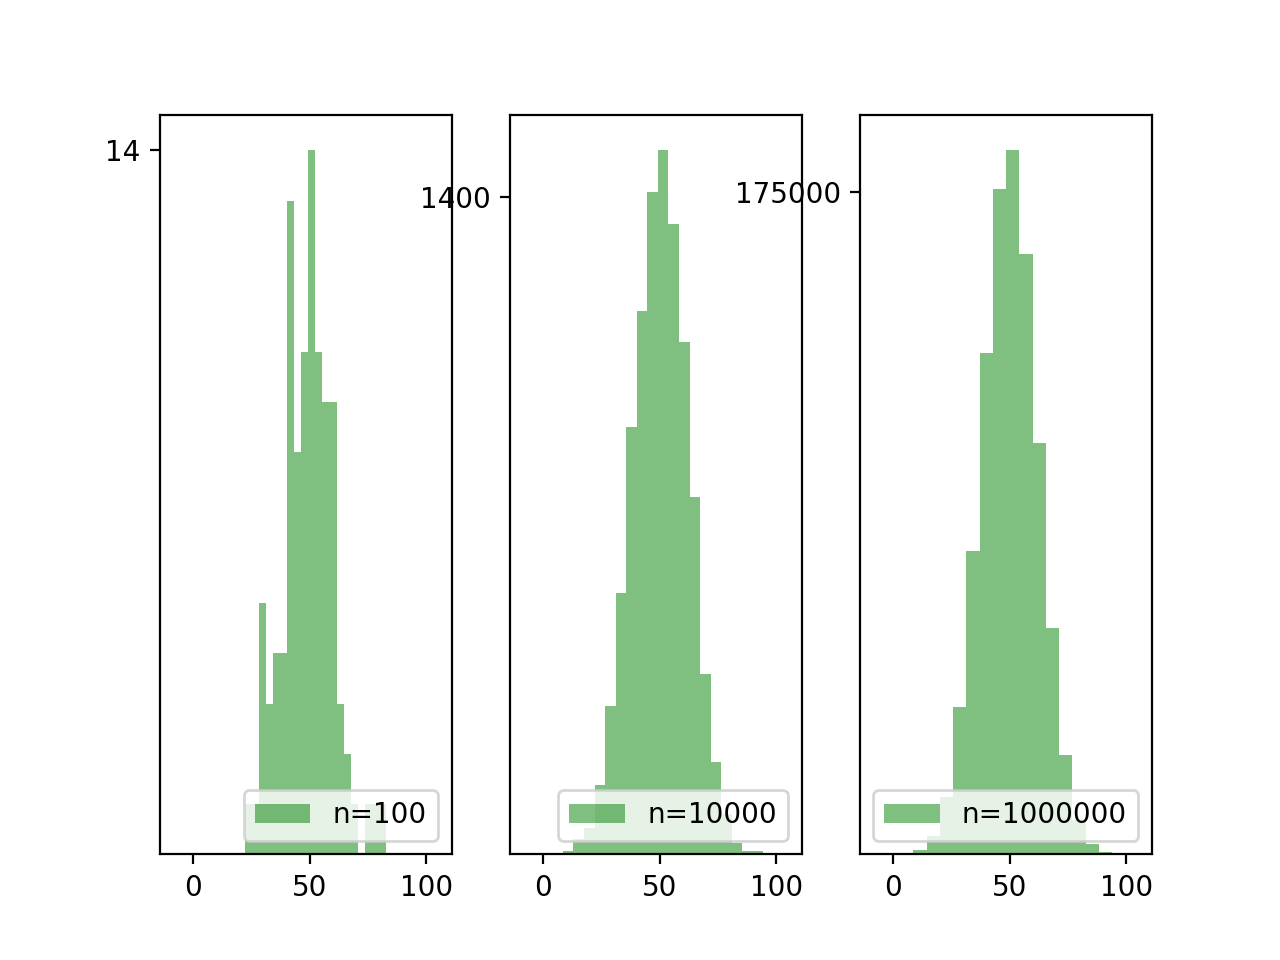

In [381]:
#histogram of normal(mena=50, std=12) distribution
f,axes=plt.subplots(1,3,sharex=True)
ns=[100,10000,1000000]
for ax,n in zip(axes,ns):
    nsample=np.random.normal(50,12,n)
    plt.sca(ax)
    plt.hist(nsample,20, color="green", alpha=0.5, label="n={}".format(n))
    plt.legend(loc=4)
    for ylab in ax.get_yticklabels()[:-2]:
        ylab.set_visible(False)
    for ytl in ax.get_yticklines()[:-4]:
        ytl.set_visible(False)

### miscellaneous

In [302]:
# axes in figure
printf(fig.axes) #fig.get_axes() will be deprecated
# get current figure (reference)
printf(plt.gcf())
# get current axes (reference) on current figure (plt.gcf())
printf(plt.gca())
# set current axes
plt.sca(plt.gca())
print("Write figure to ... : fig.canvas.x for x in", [x for x in dir(fig.canvas) if "print" in x])
# fig.canvas.draw()
# ax.get_xaxis()
# ax.get_yaxis()

# get/set x/y labels (using axes instance)
# ax.get_xlabel(), ax.set_xlabel()
# ax.get_ylabel(), ax.set_ylabel()

# # set x/y labels (using plt)
# plt.xlabel(), plt.ylabel()

# get/set tickline positions
# ax.get_xticks(), ax.set_xticks(), ax.get_yticks(), ax.set_yticks

# enable/disable tick lines for axes
# ax.get_xticklines().set_visible({True, False})
# ax.get_yticklines().set_visible({True, False})

# get/set tick labels
# ax.get_xticklabels(), ax.set_yticklabels(), ax.get_xticklabels(), ax.set_yticklabels()

# get/set arbitrary object properties
# plt.getp(obj_instance) # lists all properties
# plt.getp(obj_instance, property_name_string)
# plt.setp(obj_instance, property=value) #here property is a keyword like plt.setp(ax, title=":)")
# plt.setp(obj_instance, property1=value1, property2=value2, ...)
# plt.setp(obj_instance, property_name_string) #lists the possible values property can take
# plt.setp(ax,"xticks") # returns xticks: sequence of floats 

[<matplotlib.axes._subplots.AxesSubplot object at 0x11f28a198>, <matplotlib.axes._subplots.AxesSubplot object at 0x11f1d6518>, <matplotlib.axes._subplots.AxesSubplot object at 0x11cc048d0>, <matplotlib.axes._subplots.AxesSubplot object at 0x1160c97f0>, <matplotlib.axes._subplots.AxesSubplot object at 0x11c98e278>, <matplotlib.axes._subplots.AxesSubplot object at 0x11ccdbba8>]

Figure(1280x960)

Axes(0.125,0.11;0.775x0.77)

Write figure to ... : fig.canvas.x for x in ['print_figure', 'print_jpeg', 'print_jpg', 'print_png', 'print_raw', 'print_rgba', 'print_tif', 'print_tiff', 'print_to_buffer']


<IPython.core.display.Javascript object>


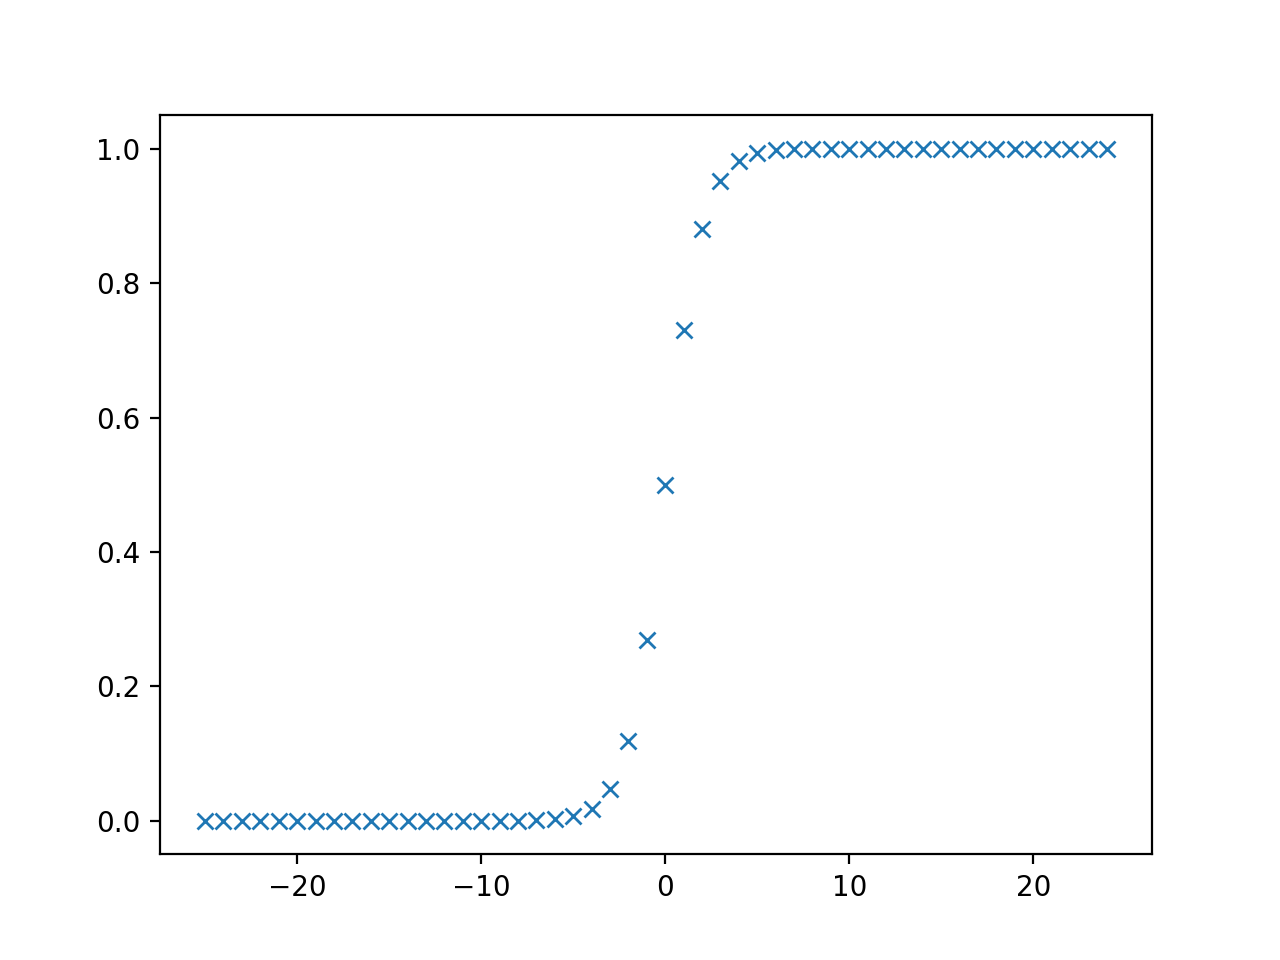

In [294]:
f=plt.figure()
x0=np.arange(-25,25)
sigmoid=1/(1+np.exp(-x0))
line=plt.plot(x0,sigmoid, 'x') #sigmoid function

In [306]:
ax=plt.gca()